# Tushare 数字货币

In [1]:
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as st
from statsmodels.tsa.stattools import coint
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARMA

In [2]:
ts_api = ts.pro_api('')

In [13]:
df = ts_api.coinbar(exchange='okex', symbol='btcusdt', freq='daily', start_date='20190801', end_date='')
# df = ts.bar('399300.SZ', conn=ts.get_apis(), asset='INDEX', start_date='2019-10-10', end_date='')
# df = ts_api.coin_mins(exchange='future_okex', symbol='eth', freq='15min', trade_date='20190910')

In [15]:
df = df.sort_values('date', ascending=True)
df.tail()

,symbol,date,open,high,low,close,vol
4,btcusdt,2019-10-12,8346.2,8398.0,8221.0,8371.9,12917.225351
3,btcusdt,2019-10-13,8372.0,8440.0,8281.0,8403.6,7236.585667
2,btcusdt,2019-10-14,8403.1,8449.5,8150.0,8252.0,14640.862623
1,btcusdt,2019-10-15,8250.9,8409.9,8207.5,8317.8,18231.440447
0,btcusdt,2019-10-16,8316.8,8317.7,7932.7,7950.4,19695.403642


# 绝对收敛套利

在两个市场交易同一个品种进行对冲交易。

In [ ]:
s1 = ts_api.coin_mins(exchange='future_okex', symbol='btcusdt', trade_date='20191001', freq='1min', fields='date,close,contract_type')
s2 = ts_api.coin_mins(exchange='future_huobi', symbol='btc', trade_date='20191001', freq='1min', fields='date,close,contract_type')

s1 = s1[s1['contract_type'] == 'this_week']
s2 = s2[s2['contract_type'] == 'this_week']
del s1['contract_type']
del s2['contract_type']

s1['date'] = pd.to_datetime(s1.date)
s2['date'] = pd.to_datetime(s2.date)
s1.columns = ['datetime', 'close']
s2.columns = ['datetime', 'close']
s1.set_index('datetime', inplace=True)
s2.set_index('datetime', inplace=True)

m = pd.merge(s1, s2, left_index=True, right_index=True)
ratios = m.close_x / m.close_y
coint(m.close_x, m.close_y)

# 现期套利

对现货和期货进行对冲交易。

In [ ]:
s1 = ts_api.coin_mins(exchange='future_huobi', symbol='btc', trade_date='20191003', freq='5min', fields='date,close,contract_type')
s2 = ts_api.coin_mins(exchange='huobi', symbol='btcusdt', trade_date='20191003', freq='5min', fields='date,close')
s1 = s1[s1['contract_type'] == 'this_week']
del s1['contract_type']
s1['date'] = pd.to_datetime(s1.date)
s2['date'] = pd.to_datetime(s2.date)
s1.columns = ['datetime', 'close']
s2.columns = ['datetime', 'close']
s1.set_index('datetime', inplace=True)
s2.set_index('datetime', inplace=True)

m = pd.merge(s1, s2, left_index=True, right_index=True)
ratios = m.close_x / m.close_y
coint(m.close_x, m.close_y)

# BTC-USDT/ETH/BTC 套利

In [6]:
s1 = ts_api.coin_mins(exchange='huobi', symbol='btcusdt', trade_date='20191003', freq='1min', fields='date,close')
s2 = ts_api.coin_mins(exchange='huobi', symbol='ethbtc', trade_date='20191003', freq='1min', fields='date,close')

s1['date'] = pd.to_datetime(s1.date)
s2['date'] = pd.to_datetime(s2.date)
s1.columns = ['datetime', 'close']
s2.columns = ['datetime', 'close']
s1.set_index('datetime', inplace=True)
s2.set_index('datetime', inplace=True)

m = pd.merge(s1, s2, left_index=True, right_index=True)
ratios = m.close_x / m.close_y
coint(m.close_x, m.close_y)

(-3.1007569644799333,
 0.08815087433479679,
 array([-3.90406696, -3.34037937, -3.04739864]))

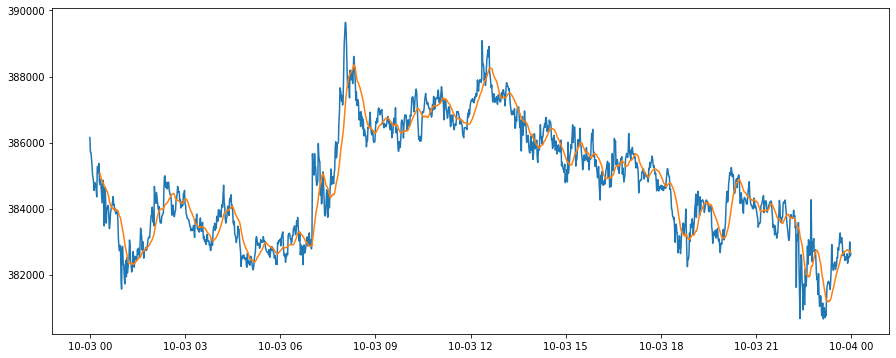

In [7]:
fig = plt.figure(figsize=(15, 6))
plt.plot(ratios)
plt.plot(ratios.rolling(20).mean())

In [10]:
result_arma.bic

20426.555187459464